In [62]:
#instal libraries
! pip install folium
pip install ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.7 MB/s eta 0:00:00a 0:00:01


In [63]:
#import libraries
import os
import sqlalchemy
import pandas as pd
import seaborn as sns
import folium

In [2]:
#find the database
os.chdir('/Users/igorlima/Desktop/sample_project')


In [3]:
#create conection with SQLite
sqlalchemy.create_engine('sqlite:///data.db')

Engine(sqlite:///data.db)

In [4]:
%load_ext sql
%sql sqlite:///data.db

In [5]:
# View the first 10 rows of the table
%%sql

SELECT *
FROM ds_salaries
LIMIT 10

 * sqlite:///data.db
Done.


field1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [6]:
#Select the "job title" and "salary" columns and round the values
%%sql

SELECT DISTINCT "job_title" as "Job title", ROUND (AVG (salary_in_usd), 0) as "Salary"
from "ds_salaries"
GROUP BY "job_title"
ORDER BY "Salary" DESC
LIMIT 10

 * sqlite:///data.db
Done.


Job title,Salary
Data Analytics Lead,405000.0
Principal Data Engineer,328333.0
Financial Data Analyst,275000.0
Principal Data Scientist,215242.0
Director of Data Science,195074.0
Data Architect,177874.0
Applied Data Scientist,175655.0
Analytics Engineer,175000.0
Data Specialist,165000.0
Head of Data,160163.0


In [7]:
#Select the "job title" and "salary" columns and round the values
%%sql

SELECT DISTINCT "job_title" as "Job title", ROUND (AVG (salary_in_usd), 0) as "Salary"
from "ds_salaries"
GROUP BY "job_title"
ORDER BY "Salary" ASC
LIMIT 10

 * sqlite:///data.db
Done.


Job title,Salary
3D Computer Vision Researcher,5409.0
Product Data Analyst,13036.0
NLP Engineer,37236.0
Computer Vision Engineer,44419.0
Big Data Engineer,51974.0
ETL Developer,54957.0
Finance Data Analyst,61896.0
Data Analytics Engineer,64799.0
AI Scientist,66136.0
Data Science Consultant,69421.0


In [8]:
# Select job titles that contain the word "analyst"
%%sql

SELECT distinct "job_title" AS "Job title"
FROM "ds_salaries"
WHERE "job_title" like "%analyst%"

 * sqlite:///data.db
Done.


Job title
Product Data Analyst
Data Analyst
Business Data Analyst
Lead Data Analyst
BI Data Analyst
Marketing Data Analyst
Financial Data Analyst
Finance Data Analyst
Principal Data Analyst


In [9]:
# Select job titles that contain the word "engineer"
%%sql

SELECT distinct "job_title" AS "Job title"
FROM "ds_salaries"
WHERE "job_title" like "%engineer%"

 * sqlite:///data.db
Done.


Job title
Big Data Engineer
Machine Learning Engineer
Lead Data Engineer
Data Engineer
Data Engineering Manager
Machine Learning Infrastructure Engineer
ML Engineer
Computer Vision Engineer
Data Analytics Engineer
Cloud Data Engineer


In [10]:
# Select job titles that contain the word "scientist"
%%sql

SELECT distinct "job_title" AS "Job title"
FROM "ds_salaries"
WHERE "job_title" like "%scientist%"

 * sqlite:///data.db
Done.


Job title
Data Scientist
Machine Learning Scientist
Lead Data Scientist
Research Scientist
AI Scientist
Principal Data Scientist
Applied Data Scientist
Applied Machine Learning Scientist
Staff Data Scientist


In [50]:
# Create a Pandas DataFrame with the average salary for entry level
%%sql

SELECT
  CASE
    WHEN job_title LIKE "%engineer%" THEN "Engineer"
    WHEN job_title LIKE "%analyst%" THEN "Analyst"
    WHEN job_title LIKE "%scientist%" THEN "Scientist"
  END AS "Data Position", ROUND (AVG (salary_in_usd), 0) AS "Avg Salary"
FROM "ds_salaries"
WHERE "experience_level" = "EN"
GROUP BY "Data Position"
ORDER BY "Data Position" DESC
LIMIT 3

 * sqlite:///data.db
Done.


Data Position,Avg Salary
Scientist,61111.0
Engineer,63245.0
Analyst,57112.0


 * sqlite:///data.db
Done.


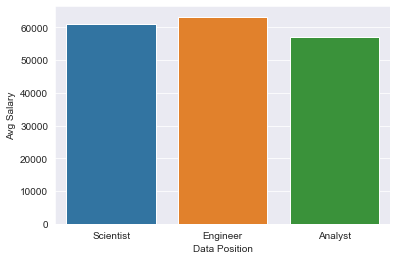

In [51]:
# Plot a bar graph with average salaries for entry level
results = %sql SELECT CASE WHEN job_title LIKE "%engineer%" THEN "Engineer" WHEN job_title LIKE "%analyst%" THEN "Analyst" WHEN job_title LIKE "%scientist%" THEN "Scientist" END AS "Data Position", ROUND (AVG (salary_in_usd), 0) AS "Avg Salary" FROM "ds_salaries" WHERE "experience_level" = "EN" GROUP BY "Data Position" ORDER BY "Data Position" DESC LIMIT 3

avg_salary = results.DataFrame()

sns.set_style('darkgrid')

sns.barplot(data = avg_salary, x="Data Position", y="Avg Salary");

In [45]:
# Create a Pandas DataFrame with the average salary for middle level
%%sql

SELECT
  CASE
    WHEN job_title LIKE "%engineer%" THEN "Engineer"
    WHEN job_title LIKE "%analyst%" THEN "Analyst"
    WHEN job_title LIKE "%scientist%" THEN "Scientist"
  END AS "Data Position", ROUND (AVG (salary_in_usd), 0) AS "Avg Salary"
FROM "ds_salaries"
WHERE "experience_level" = "MI"
GROUP BY "Data Position"
ORDER BY "Data Position" DESC
LIMIT 3

 * sqlite:///data.db
Done.


Data Position,Avg Salary
Scientist,95610.0
Engineer,81984.0
Analyst,77941.0


 * sqlite:///data.db
Done.


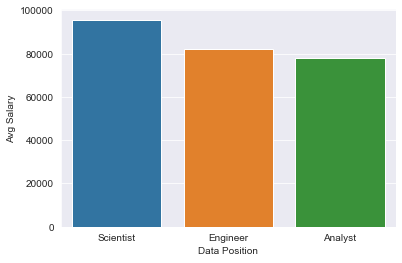

In [47]:
# Plot a bar graph with average salaries for middle level
results = %sql SELECT CASE WHEN job_title LIKE "%engineer%" THEN "Engineer" WHEN job_title LIKE "%analyst%" THEN "Analyst" WHEN job_title LIKE "%scientist%" THEN "Scientist" END AS "Data Position", ROUND (AVG (salary_in_usd), 0) AS "Avg Salary" FROM "ds_salaries" WHERE "experience_level" = "MI" GROUP BY "Data Position" ORDER BY "Data Position" DESC LIMIT 3

avg_salary = results.DataFrame()

sns.set_style('darkgrid')

sns.barplot(data = avg_salary, x="Data Position", y="Avg Salary");

In [48]:
# Create a Pandas DataFrame with the average salary for senior level
%%sql

SELECT
  CASE
    WHEN job_title LIKE "%engineer%" THEN "Engineer"
    WHEN job_title LIKE "%analyst%" THEN "Analyst"
    WHEN job_title LIKE "%scientist%" THEN "Scientist"
  END AS "Data Position", ROUND (AVG (salary_in_usd), 0) AS "Avg Salary"
FROM "ds_salaries"
WHERE "experience_level" = "SE"
GROUP BY "Data Position"
ORDER BY "Data Position" DESC
LIMIT 3

 * sqlite:///data.db
Done.


Data Position,Avg Salary
Scientist,153347.0
Engineer,136034.0
Analyst,112662.0


 * sqlite:///data.db
Done.


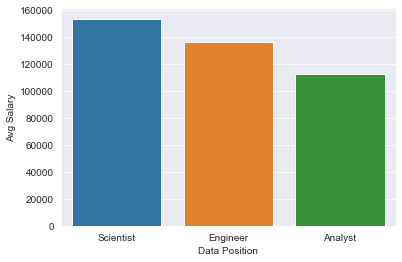

In [49]:
# Plot a bar graph with average salaries for senior level
results = %sql SELECT CASE WHEN job_title LIKE "%engineer%" THEN "Engineer" WHEN job_title LIKE "%analyst%" THEN "Analyst" WHEN job_title LIKE "%scientist%" THEN "Scientist" END AS "Data Position", ROUND (AVG (salary_in_usd), 0) AS "Avg Salary" FROM "ds_salaries" WHERE "experience_level" = "SE" GROUP BY "Data Position" ORDER BY "Data Position" DESC LIMIT 3

avg_salary = results.DataFrame()

sns.set_style('darkgrid')

sns.barplot(data = avg_salary, x="Data Position", y="Avg Salary");

In [52]:
# Create a Pandas DataFrame with the countries and number of occurrences
%%sql

SELECT distinct "company_location" AS "Country", count (*) AS "Occurrences"
from "ds_salaries"
GROUP BY "company_location"
ORDER BY "Occurrences" desc
LIMIT 10

 * sqlite:///data.db
Done.


Country,Occurrences
US,355
GB,47
CA,30
DE,28
IN,24
FR,15
ES,14
GR,11
JP,6
PT,4


In [56]:
# Create a table in the database with job titles by country
%%sql

CREATE TABLE per_country
AS
SELECT *
from
(
SELECT "company_location" AS "Country",
  CASE
    WHEN job_title LIKE "%engineer%" THEN "Engineer"
    WHEN job_title LIKE "%analyst%" THEN "Analyst"
    WHEN job_title LIKE "%scientist%" THEN "Scientist"
  END AS "Data Position", ROUND (AVG (salary_in_usd), 0) AS "Avg_Salary"
FROM "ds_salaries"
WHERE "experience_level" = "EN"
GROUP BY "Data Position", "company_location"
ORDER BY "Avg_Salary" DESC
  )
where "Data Position" <> ""
ORDER BY "Avg_Salary" DESC;

 * sqlite:///data.db
Done.


[]

In [57]:
# Create a pandas dataframe with average salaries by country
%%sql

SELECT "name", "Avg_Salary", "latitude", "longitude"
FROM
(
SELECT *
from "per_country"
Left JOIN abbrev ON per_country.Country = abbrev.country
  )
ORDER BY "Avg_Salary" DESC

 * sqlite:///data.db
Done.


name,Avg_Salary,latitude,longitude
Australia,150000.0,-25.274398,133.775136
United States,108773.0,37.09024,-95.712891
China,100000.0,35.86166,104.195397
Algeria,100000.0,28.033886,1.659626
United Kingdom,96283.0,55.378051,-3.435973
United States,90200.0,37.09024,-95.712891
Australia,86703.0,-25.274398,133.775136
United States,77556.0,37.09024,-95.712891
Canada,59500.0,56.130366,-106.346771
France,59102.0,46.227638,2.213749


In [60]:
results = %sql SELECT "name", "Avg_Salary", "latitude", "longitude" FROM ( SELECT * from "per_country" Left JOIN abbrev ON per_country.Country = abbrev.country ) ORDER BY "Avg Salary" DESC

map = results.DataFrame()

 * sqlite:///data.db
Done.


In [64]:
#Creating a base map
m = folium.Map()
for lat, lon, salary in  zip(map['latitude'],map['longitude'],map['Avg_Salary']):
    #Creating the marker
    folium.Marker(
    #Coordinate of the country
    location=[lat, lon],
    #The popup that show up if click the marker
    popup=salary
    ).add_to(m)
m

In [65]:
# Delete a table on the datadase
%%sql

DROP TABLE t

 * sqlite:///data.db
Done.


[]